In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mpl.style.use('seaborn')

In [2]:
np.random.seed(1)
tf.random.set_seed(1)

# 데이터셋 및 변수 준비

In [3]:
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)

    plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label='train loss')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label='validation loss')
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

In [5]:
# Data loading 및 Dataset 생성
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10

In [7]:
X_train = train_image/255.
X_test = test_image/255.

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [9]:
train_label[0]

5

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [18]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

# 모델의 크기 변경

### 1. (8)

In [22]:
# 작은 모델 => layer수, unit수가 적은 모델
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # Hidden
    model.add(keras.layers.Dense(8, activation='relu'))
    # Output
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [23]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 학습
history = model.fit(train_dataset,
                     epochs=N_EPOCHS,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9299 - val_loss: 0.2716 - val_accuracy: 0.9230
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2445 - accuracy: 0.9308 - val_loss: 0.2729 - val_accuracy: 0.9220
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2435 - accuracy: 0.9305 - val_loss: 0.2734 - val_accuracy: 0.9218
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2424 - accuracy: 0.9310 - val_loss: 0.2708 - val_accuracy: 0.9218
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2416 - accuracy: 0.9309 - val_loss: 0.2712 - val_accuracy: 0.9240
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2409 - accuracy: 0.9311 - val_loss: 0.2713 - val_accuracy: 0.9219
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2390 - accuracy: 0.9314 - va

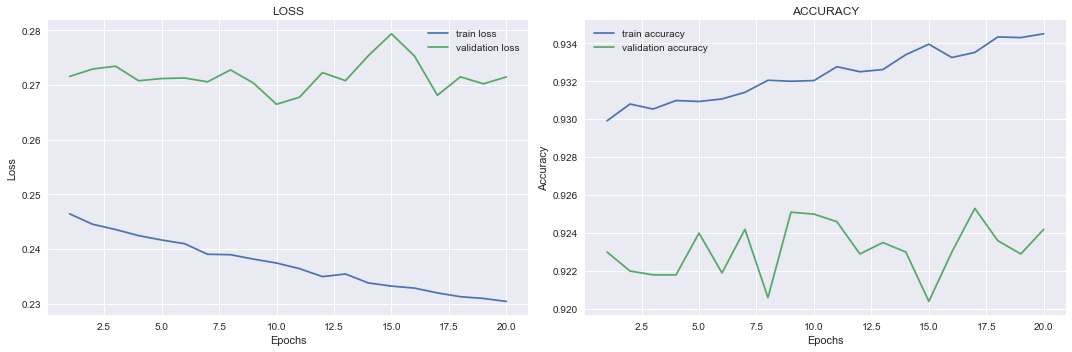

In [28]:
plot_result(history)

### 2. (256,128)

In [41]:
# 중간 모델1
# hidden layer: 4 - 256, 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # Hidden
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    # Output
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [42]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 학습
history = model.fit(train_dataset,
                     epochs=N_EPOCHS,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2512 - accuracy: 0.9275 - val_loss: 0.1159 - val_accuracy: 0.9634
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0977 - accuracy: 0.9707 - val_loss: 0.0932 - val_accuracy: 0.9700
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0749 - val_accuracy: 0.9765
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0736 - val_accuracy: 0.9773
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0727 - val_accuracy: 0.9785
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0638 - val_accuracy: 0.9799
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0216 - accuracy: 0.9929 - va

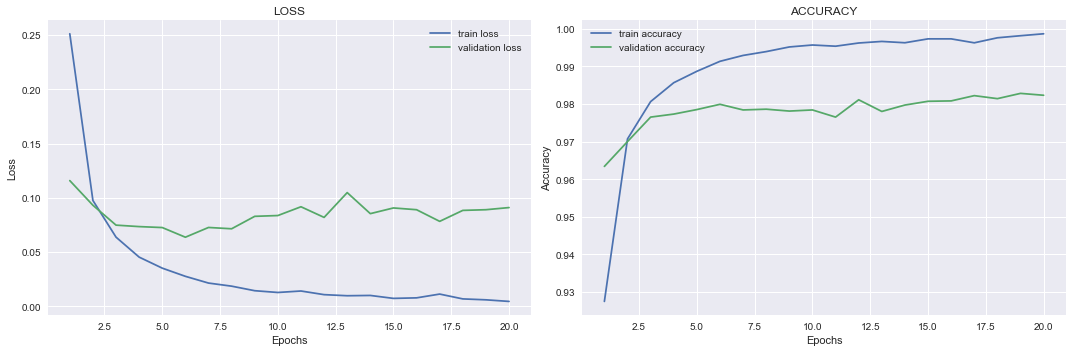

In [45]:
plot_result(history)

### 3. (128)

In [46]:
# 중간 모델2
# hidden layer: 1 - 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # Hidden
    model.add(keras.layers.Dense(128, activation='relu'))
    # Output
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [47]:
model = create_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [48]:
# 학습
history = model.fit(train_dataset,
                     epochs=N_EPOCHS,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3316 - accuracy: 0.9078 - val_loss: 0.1806 - val_accuracy: 0.9486
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1494 - accuracy: 0.9574 - val_loss: 0.1263 - val_accuracy: 0.9631
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9703 - val_loss: 0.1035 - val_accuracy: 0.9686
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9761 - val_loss: 0.0941 - val_accuracy: 0.9728
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9816 - val_loss: 0.0821 - val_accuracy: 0.9742
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0521 - accuracy: 0.9850 - val_loss: 0.0791 - val_accuracy: 0.9744
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9876 - va

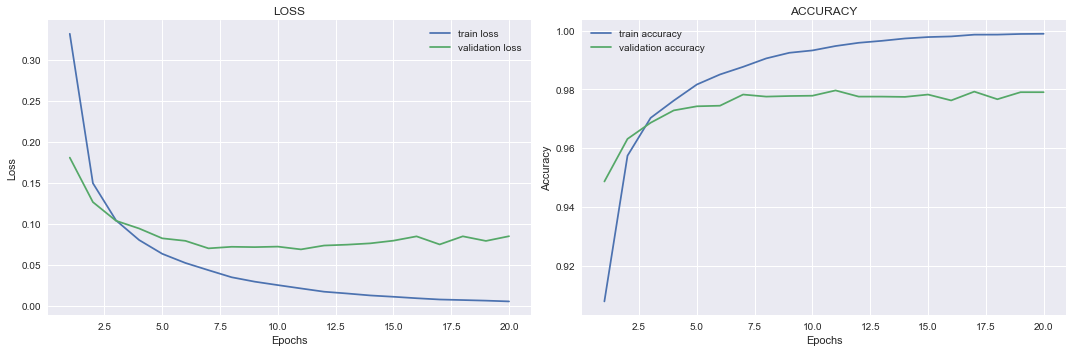

In [49]:
plot_result(history)

### 4. (128, 128)

In [50]:
# 중간 모델3
# hidden layer: 2 - 128, 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # Hidden
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    # Output
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [51]:
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 학습
history = model.fit(train_dataset,
                     epochs=N_EPOCHS,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2958 - accuracy: 0.9143 - val_loss: 0.1357 - val_accuracy: 0.9603
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9642 - val_loss: 0.1022 - val_accuracy: 0.9680
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9746 - val_loss: 0.0860 - val_accuracy: 0.9725
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0848 - val_accuracy: 0.9738
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0768 - val_accuracy: 0.9761
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0761 - val_accuracy: 0.9750
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0303 - accuracy: 0.9902 - va

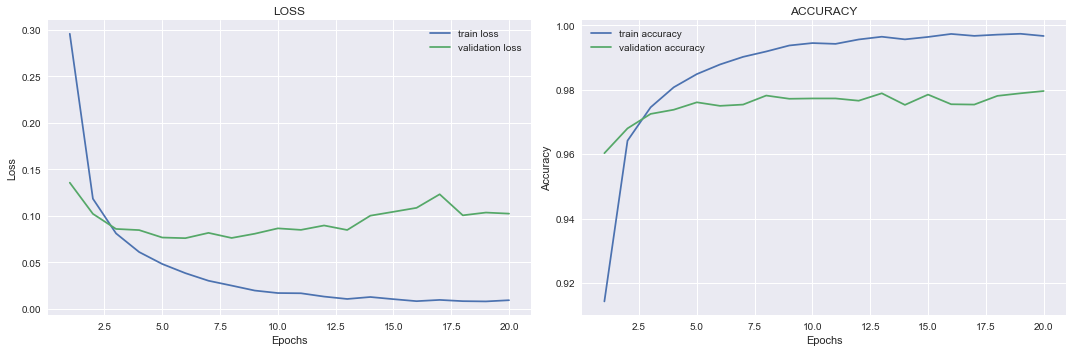

In [53]:
plot_result(history)

### 5. (256,256,128,128)

In [30]:
# 큰 모델
# hidden layer: 4 - 256, 256, 128, 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # Hidden
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    # Output
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [31]:
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [32]:
# 학습
history = model.fit(train_dataset,
                     epochs=N_EPOCHS,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.2455 - accuracy: 0.9283 - val_loss: 0.1081 - val_accuracy: 0.9662
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0953 - accuracy: 0.9710 - val_loss: 0.0881 - val_accuracy: 0.9712
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0649 - accuracy: 0.9791 - val_loss: 0.0823 - val_accuracy: 0.9753
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0776 - val_accuracy: 0.9777
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0405 - accuracy: 0.9869 - val_loss: 0.0815 - val_accuracy: 0.9771
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0836 - val_accuracy: 0.9780
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0283 - accuracy: 0.9908 - va

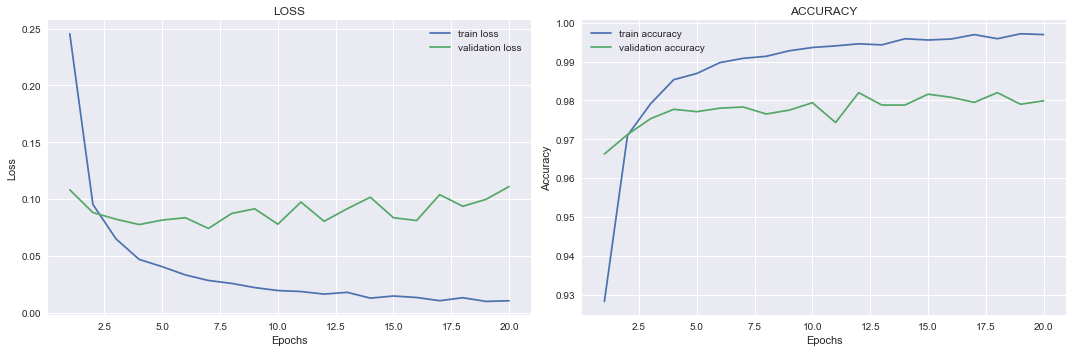

In [33]:
plot_result(history)